In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
import cv2
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from sam_hq.segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "assets/sam_hq_vit_b.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# mask_generator = SamAutomaticMaskGenerator(sam)
predictor = SamPredictor(sam)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

<All keys matched successfully>


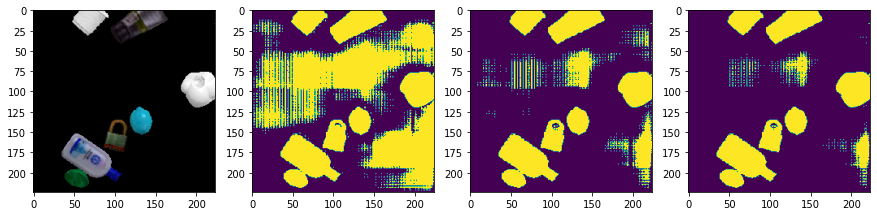

In [30]:
image = cv2.imread('assets/color_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)


# draw center points
# for point in center_points:
#     cv2.circle(image, (point[0], point[1]), 2, (255, 0, 0), -1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image)

for idx, num_grids in enumerate([16, 32, 64]):
    center_points = []

    interval = 224 // num_grids

    for i in range(num_grids):
        for j in range(num_grids):
            center_points.append([i*interval+interval//2, j*interval+interval//2])
    center_points = np.array(center_points)
    # x = np.linspace(0, 224, num_grids).astype(int)
    # y = np.linspace(0, 224, num_grids).astype(int)
    # print(x, y)

    # center_points = np.array([[i, j] for i in x for j in y])
    if num_grids == 1:
        center_points = np.array([[111, 111]])
    masks, scores, logits = predictor.predict(
            point_coords=center_points,
            point_labels=[1 for _ in range(len(center_points))],
            # box=np.array([56, 56, 112, 112]),
            multimask_output=False,
        )

    plt.subplot(1, 4, 2+idx)
    plt.imshow(masks[0])

(224, 224, 1) bool
(84, 84) float32


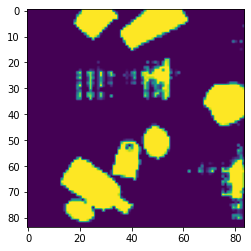

In [31]:
masks = masks.transpose(1, 2, 0)
print(masks.shape, masks.dtype)
masks = np.float32(masks)
masks = cv2.resize(masks, (84, 84))
print(masks.shape, masks.dtype)
plt.imshow(masks)

0.13016592 3.896484e-05


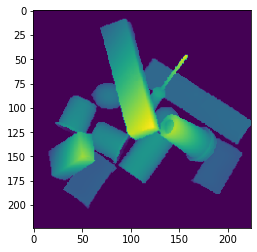

In [10]:
depth_image = np.load('assets/depth_image.npy')
plt.imshow(depth_image)
print(np.max(depth_image), np.min(depth_image))
depth_image = (depth_image - np.min(depth_image)) / (np.max(depth_image) - np.min(depth_image))
depth_image = np.where(depth_image > 0, 1, 0)

In [2]:
image = cv2.imread('assets/color_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
center_points = []
num_grids = 32
interval = 224 // num_grids

for i in range(num_grids):
    for j in range(num_grids):
        center_points.append([i*interval+interval//2, j*interval+interval//2])
center_points = np.array(center_points)

# see if the depth of the center points is 1
# depth = depth_image[center_points[:, 0], center_points[:, 1]]
# center_points = center_points[depth == 1]
print(center_points.shape)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
        point_coords=center_points,
        point_labels=[1 for _ in range(len(center_points))],
        multimask_output=False,
    )
plt.imshow(masks[0])

NameError: name 'cv2' is not defined

/mnt/c/Users/Fried/Documents/GitHub/SAMG/sam_hq/segment_anything/utils/amg.py:118: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  change_indices = diff.nonzero()


16
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


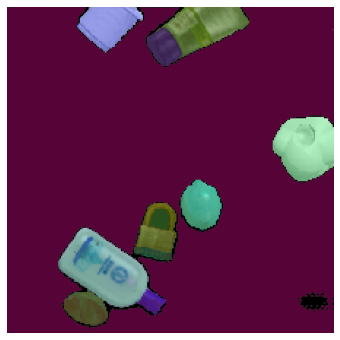

In [3]:


image = cv2.imread('assets/color_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)
print(len(masks))
print(masks[0].keys())
plt.figure(figsize=(6,6))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

16


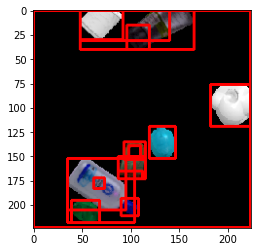

In [54]:
print(len(masks))
# draw rectangles around the object
# from xywh to xyxy
for mask in masks:
    x, y, w, h = np.array(mask['bbox']).astype(int)
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(image)

In [7]:
import numpy as np

data = np.load('assets/grasp_pose_set.npz', allow_pickle=True)
data.values()

ValuesView(<numpy.lib.npyio.NpzFile object at 0x7198ddd04d60>)